<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/cuadernos/Plucked_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuerda Vibrante de Extremos Fijos

### Plucked String.


Prof. Mario I. Caicedo

El problema del ''plucked string'' consiste en resolver el problema de Cauchy para una cuerda vibrante de extremos fijos sujeta a las condiciones iniciales:

$$u(x,0)=\begin{cases}\frac{h}{s}x\,,0<x<d\\h-\frac{h}{L-d}(x-d)\,,d<x<L\end{cases}$$

$$\dot{u}(x,0)=0$$

La técnica es sencilla, en vista de que la cuerda tiene exremos fijos, la solución general al problema de Cauchy es una expansión en modos de la forma

$$u(x,t)=\sum_{n=1}^{\infty}\left[a_ncos\left(n\omega_0t\right)+b_nsen\left(n\omega_0t\right)\right]sen\left(\frac{n\pi{}x}{L}\right)$$

Las condiciones iniciales implican $b_n=0$, $\forall{}n$ y los coeficientes $a_n$ se obtienen como los coeficientes de Fourier convencionales del desarollo

$$
u(x,0)=\sum_{n=1}^{\infty}\,a_n\,sen\left(\frac{n\pi{}x}{L}\right)
$$


El resultado es

$$u(x,t)=\sum_{n=1}^{\infty}\left[\frac{2h}{n^2\pi^2}\frac{L^2}{d(L-d)}sen\left(\frac{nd\pi}{L}\right)\right]sen\left(\frac{n\pi{}x}{L+d}\right)cos\left(2\pi\frac{nc}{2L}t\right)$$





## PROBLEMA: 

Reproduzca la solución analítica que se está usando en este cuaderno.

Referencia: https://www.acs.psu.edu/drussell/Demos/Pluck-Fourier/Pluck-Fourier.html

Bibliotecas

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Definiendo el modo

In [ ]:
def coeff(n,h,d,L):
  
  A=2*h/(np.pi**2*n**2)

  B=L**2/(d*(L-d))

  C=np.sin(d*n*np.pi/L)

  return A*B*C

In [ ]:
def omega(n,vel,L):

  Om=2.*np.pi*vel*n/L

  return Om

Parámetros 

In [ ]:
h=1
d=4
L=16
vel=.5
Num_ters=20

In [ ]:
def u(x,t,h,d,L,Num_ters):
    u=np.zeros(1000)
    for p in range(1,Num_ters):
      u = u+coeff(p,h,d,L)*np.sin(p*np.pi*x/(L+d))*np.cos(omega(p,vel,L)*t)
    return u

* Creando la figura y los ejes

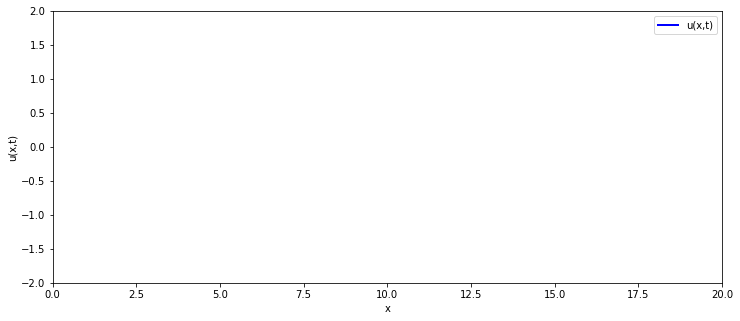

In [ ]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)   

ax1.set_xlim(( 0, 20))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')

txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)

ax1.legend(['u(x,t)']);

* Animación

In [ ]:
def init():
    line1.set_data([], [])
    return line1,

In [ ]:
def drawframe(n):
    x = np.linspace(0, 20, 1000)
    
    y1 = u(x,n,h,d,L,Num_ters)
    
    line1.set_data(x, y1)
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return line1,
    

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
#anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
# Setting up variables for 2D-Fourier Series
Pi = np.pi
c = 1
lx = 1
ly = 1
samples_x, samples_y = (50, 50)
x = np.linspace(0, lx, samples_x)
y = np.linspace(0, ly, samples_y)
grid_x, grid_y = np.meshgrid(x,y)

In [ ]:
# Coefficient function
A_nm = lambda n, m : 1/(m*n*Pi**2) # change this for different fourier series

# kernels
sin_kernel = lambda n, s, L : np.sin(2*Pi*n*s/L)
cos_kernel = lambda n, s, L : np.cos(2*Pi*n*s/L)

In [ ]:
def z(x_grid, y_grid, t, max_n, max_m):
  z = np.zeros((samples_x, samples_y)) # pre-arrange memory

  # welcome to loop hell
  for _n in range(max_n):
    for _m in range(max_m):
      n, m = _n+1, _m+1  # indexing starts at 0, actual values start at 1
      z += A_nm(n,m)*sin_kernel(n,grid_x,lx)*sin_kernel(m,grid_y,ly)*cos_kernel(np.sqrt(n**2 + m**2),t,1)
  return z


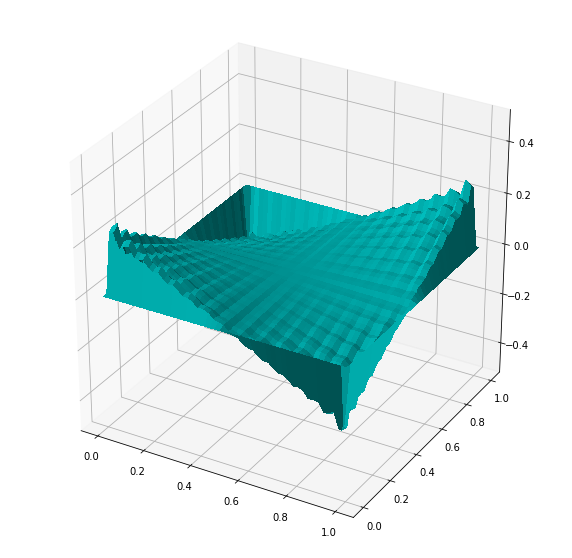

In [ ]:
# setting up figure
fig_3d = plt.figure(figsize=(10,10))
ax_3d = plt.subplot(projection="3d")
ax_3d.set_zlim(-0.5, 0.5)

# arranging z-values for each animation frame
max_time  = 2*Pi        # max simulation time
frames    = 200        # number of frames to get to max_time
z_values  = np.linspace(0, max_time, frames)
z_value_data = np.zeros((frames, samples_x, samples_y)) # reserving memory for frame z-data
for i in range(frames):
  z_value_data[i] = z(grid_x, grid_y, z_values[i], 15, 15) # computing z-data per frame

# setting up initial plot
plot = [ax_3d.plot_surface(grid_x, grid_y, z_value_data[0], antialiased=False, color="c", linewidth=0)]

# setting up animation draw callback
def update_3d_plot(frame, values, plot):
  plot[0].remove()
  plot[0] = ax_3d.plot_surface(grid_x, grid_y, values[frame], antialiased=False, color="c", linewidth=0)
  return plot[0],

In [ ]:
anim_3d = animation.FuncAnimation(fig_3d, update_3d_plot, fargs=(z_value_data, plot), frames=frames, interval=50, blit=False)
HTML(anim_3d.to_html5_video())

El asunto es así, como en 2+1 la ec de ondas es
$$
\nabla^2\phi-\frac{1}{v^2}\partial^2_t\phi=0
$$
la relación de dispersión que queda es
$$k_x^2+k_y^2=\fac{\omega^2}{v^2}\,,$$
ahora bien, si lo que oscila es una menbrana rectangular, consus arists fijas, los numeros de onda resultan cunatizados (para satisfacer las condiciones de borde) de manera que
$$
\omega^2_{n_x,n_y}=v^2\left[\frac{n_x^2}{L_x^2}+\frac{n_y^2}{L_y^2}\right]\pi^2$$
y los modos normales son, evidentemente
$$
\phi_{n_x,n_y}(x,y,t)=sen(k_{n_x}x)sen(k_{n_y}y)\,cos(\omega_{n_x,n_y})t)\,,
$$
que explícitamente se lee
$$
\phi_{n_x,n_y}(x,y,t)=sen(\frac{n_x\pi{}x}{L_x})sen(\frac{n_y\pi{}y}{L_y})\,cos(\omega_{n_x,n_y})t)\,,
$$

y esta última formulita es lo que habría que animar.

Por cierto, por si no te habpias dado cuenta,

La cuantización de los autovalores del lapalaciano ocurre siempre que pretendas encontrar funciones armónicas en un conjunto compacto (con o sin frontera). 

En el caso que acabamos de discutir, el conjunto es un rectángulo, que obviamente es compacto y CON frontera, pero, en una esfera el asunto también ocurres (la esfera es compacta y sin frontera) y or eso es que los armónicos esféricos tienen índices discretos ($Y_m^\ell(\theta,\phi)$, en casos más intereante, como un toro, por ejemplo pasan cosas adicioales que tienen que ver con el hecho de que eltoro es NO simplemente conexo. 